#### Suppot Vector Machine Classification on Synthetic Data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from SVM import SupportVectorMachine, generate_test_data, convert_labels, create_contour_plot, predict_test, create_3d_animation

##### 1. Display plots that illustrate the margin and decision boundary of a SVM with a linear kernel on linearly separable data along with prediction confidence

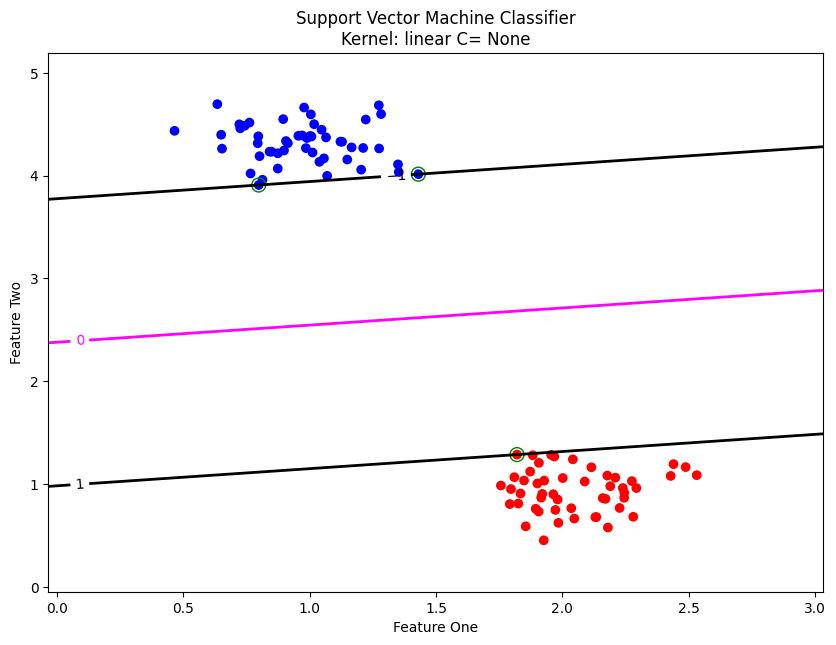

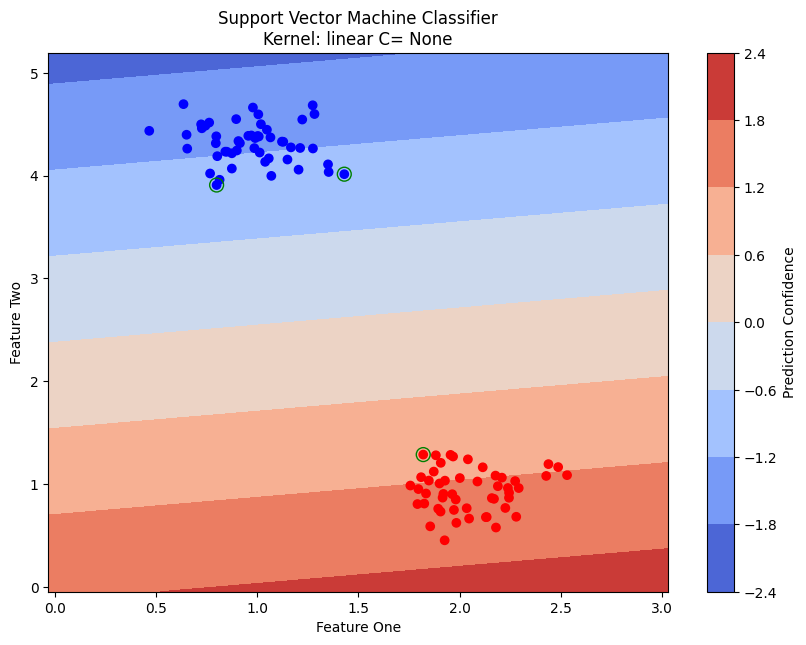

In [2]:
X, y = generate_test_data(std=0.2)
svm = SupportVectorMachine(C=0)
svm.fit(X, y)
create_contour_plot(svm, X, y)
create_contour_plot(svm, X, y, filled=True)

##### 2. Create an animation to illustrate the decision boundary hyperplane of a linear kernel SVM in 3D

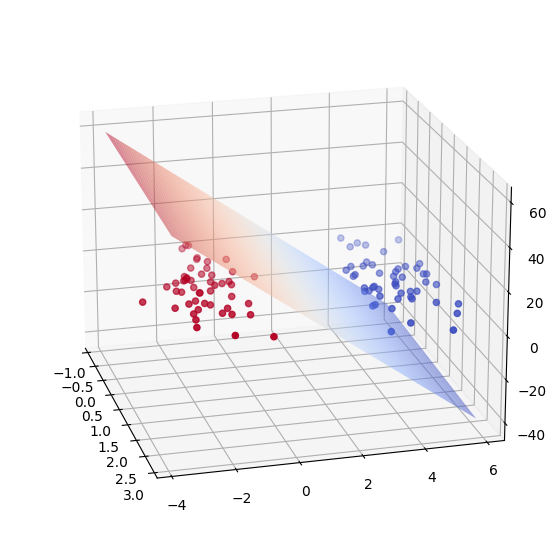

In [3]:
X, y = generate_test_data(n_features=3, std=0.8)
svm = SupportVectorMachine()
svm.fit(X, y)
create_3d_animation(svm, X, y)

##### 3. Display plots that illustrate the margin and decision boundary of a SVM with a linear kernel on non-linearly separable data along with prediction confidence

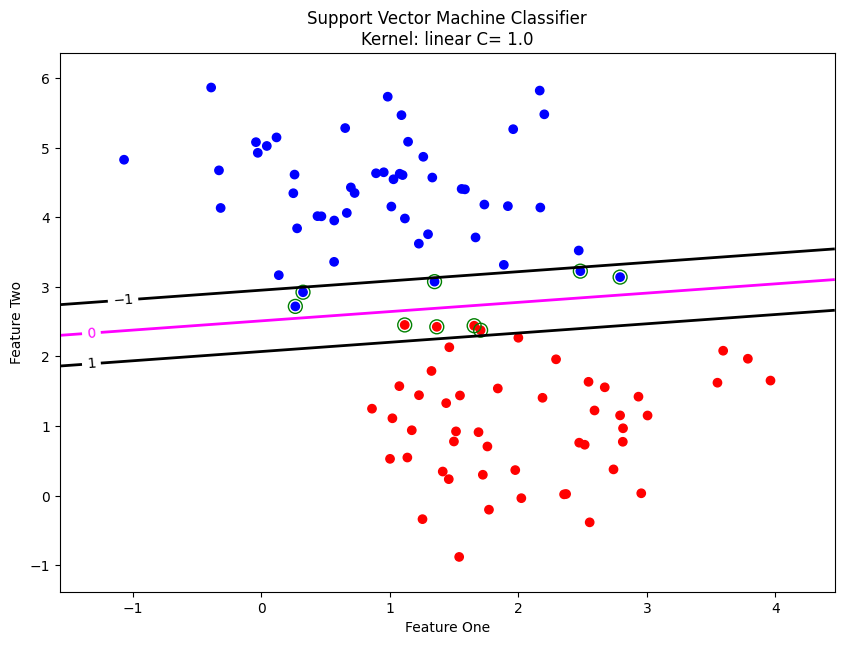

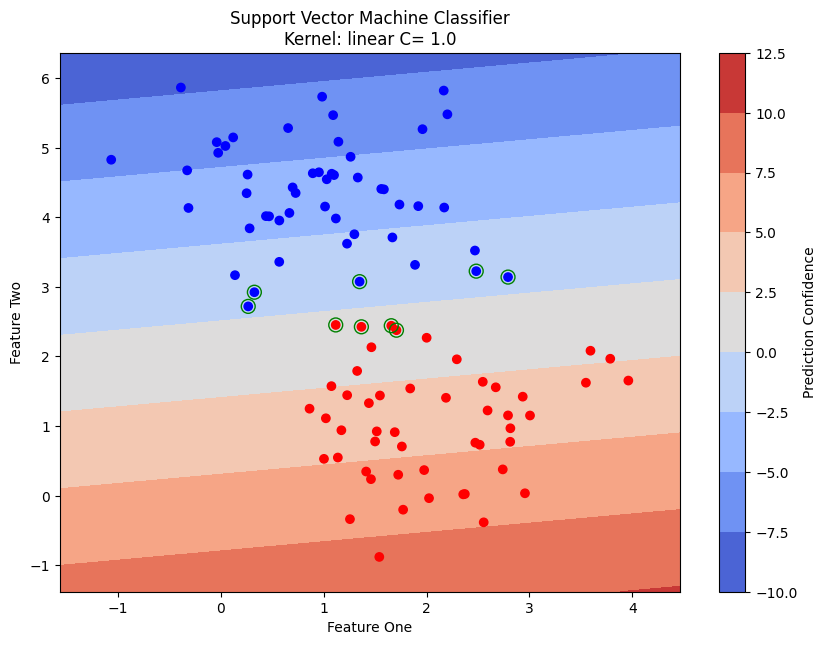

In [4]:
X, y = generate_test_data(std=0.8)
svm = SupportVectorMachine(C=1)
svm.fit(X, y)
create_contour_plot(svm, X, y)
create_contour_plot(svm, X, y, filled=True)

##### 4. Display plots that illustrate the margin and decision boundary of a SVM with a polynomial kernel on non-linearly separable data along with prediction confidence

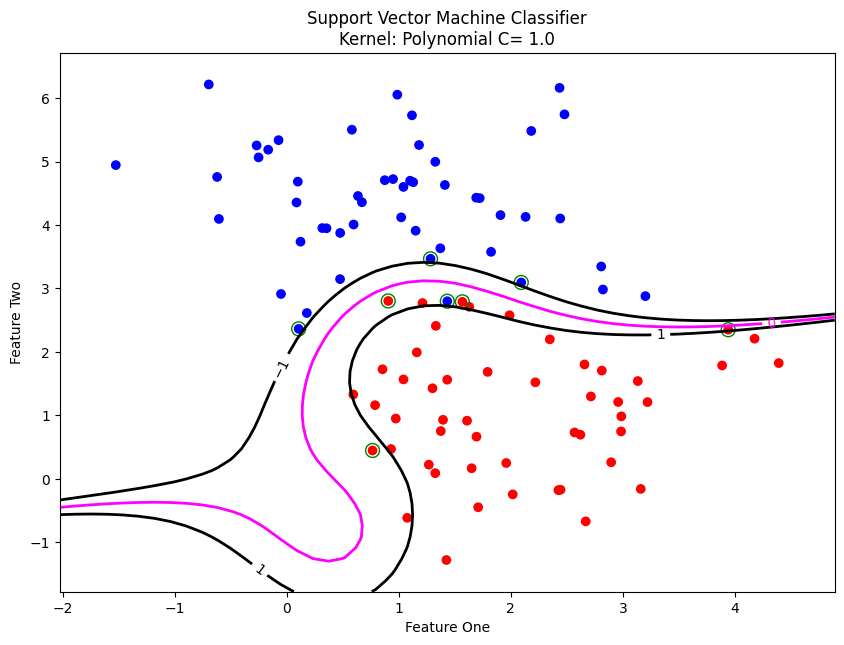

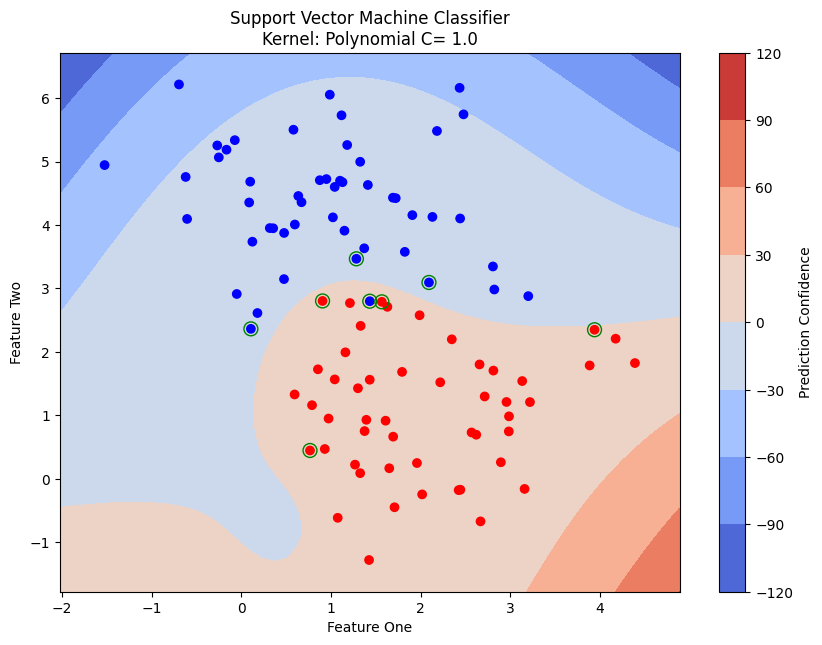

In [5]:
X, y = generate_test_data(std=0.98)
svm = SupportVectorMachine(kernel='polynomial', degree=3, C=1)
svm.fit(X, y)
create_contour_plot(svm, X, y, 'Polynomial')
create_contour_plot(svm, X, y, 'Polynomial', filled=True)

##### 5. Display plots that illustrate the margin and decision boundary of a SVM with a Radial Basis Function kernel on non-linearly separable data along with prediction confidence

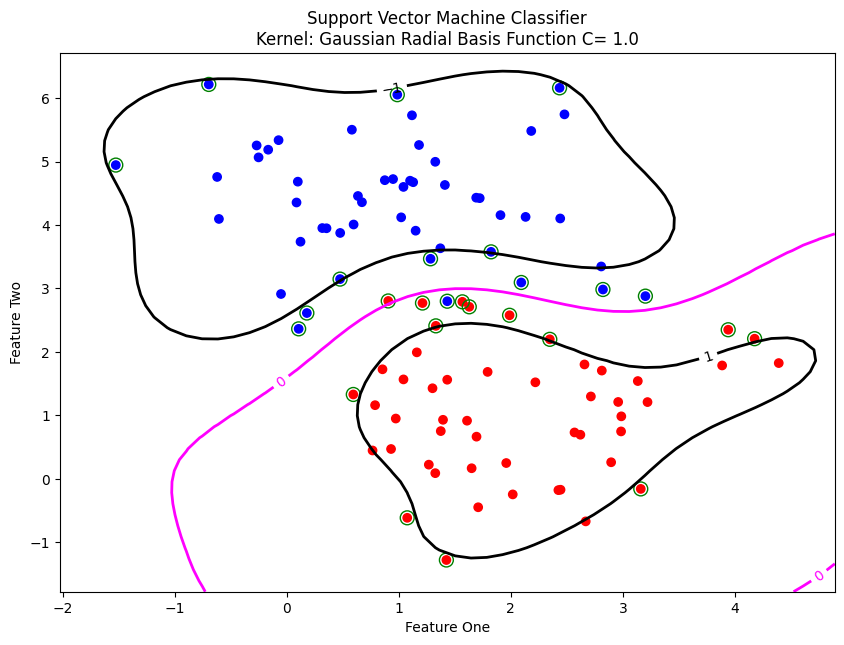

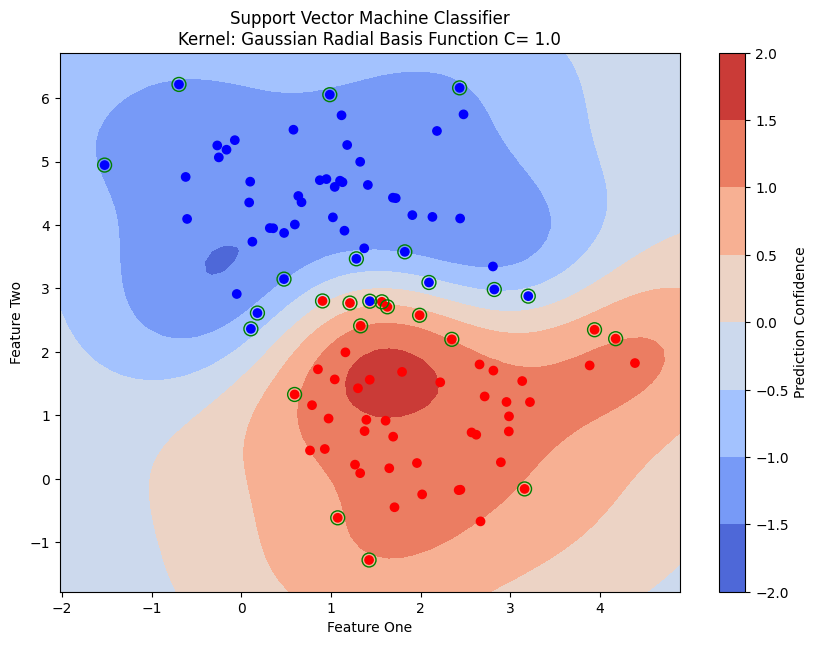

In [6]:
X, y = generate_test_data(n_samples=100, std=0.98)
svm = SupportVectorMachine(kernel='rbf', gamma=0.4, C=1)
svm.fit(X, y)
create_contour_plot(svm, X, y, 'Gaussian Radial Basis Function')
create_contour_plot(svm, X, y, 'Gaussian Radial Basis Function', filled=True)

#### Support Vector Machine for Classification on Marketing Target

In [7]:
# Load Data
market_data = pd.read_csv('./dataset/Social_Network_Ads.csv', header=0)

# Remove the First Column
market_data = market_data.drop(market_data.columns[0], axis=1)

# Training Set
train_X = market_data.iloc[0:300, 0:-1].values
train_Y = market_data.iloc[0:300:, -1].values

# Test Set
test_X = market_data.iloc[300:, 0:-1].values
test_Y = market_data.iloc[300:, -1].values

# Standardize the Features for Both Training Set and Test Set
scaler = StandardScaler()

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Convert labels for outputs
train_Y = convert_labels(train_Y)
test_Y = convert_labels(test_Y)

##### 1. SVM with a linear kernel on marketing target data along with prediction confidence and performance test

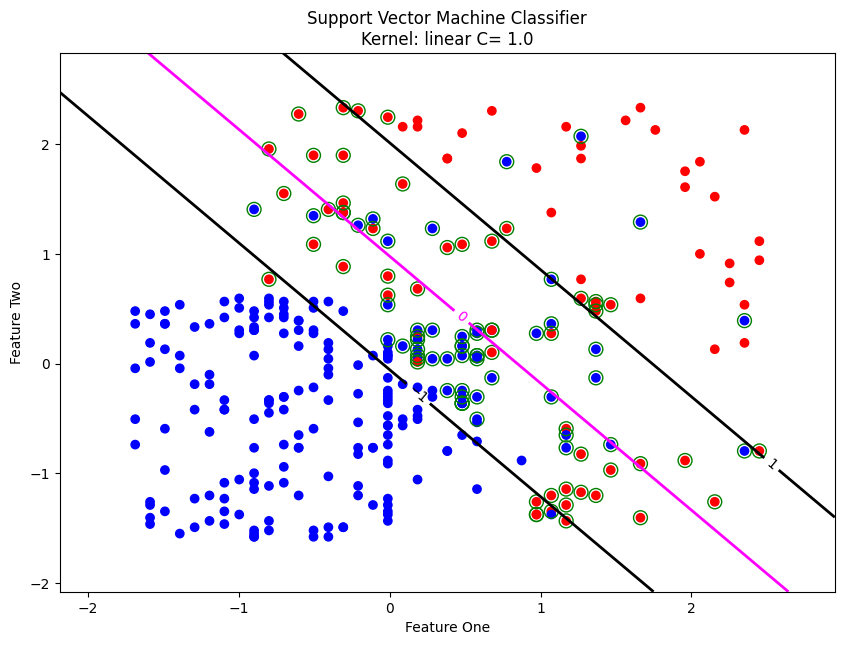

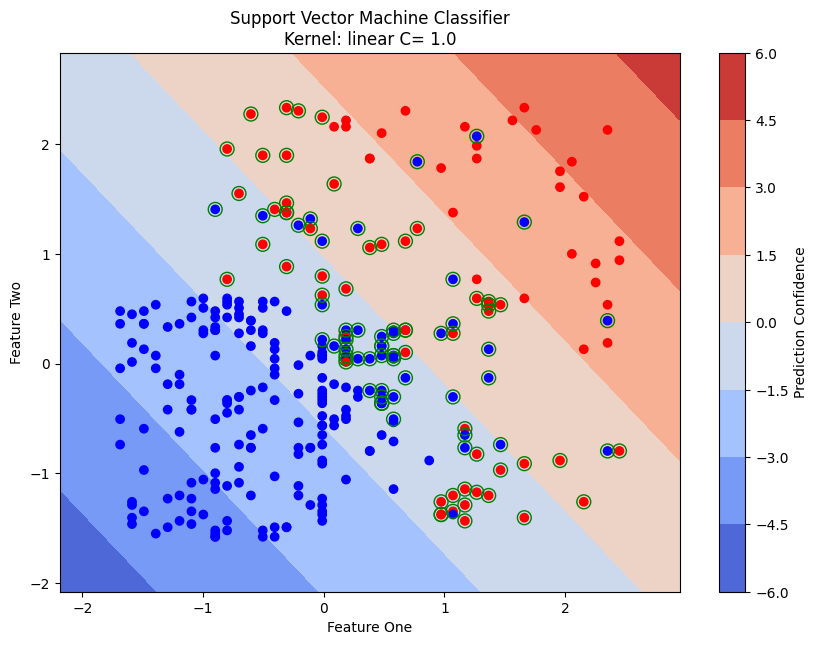

              precision    recall  f1-score   support

        -1.0       0.61      0.92      0.74        38
         1.0       0.93      0.65      0.76        62

    accuracy                           0.75       100
   macro avg       0.77      0.78      0.75       100
weighted avg       0.81      0.75      0.75       100



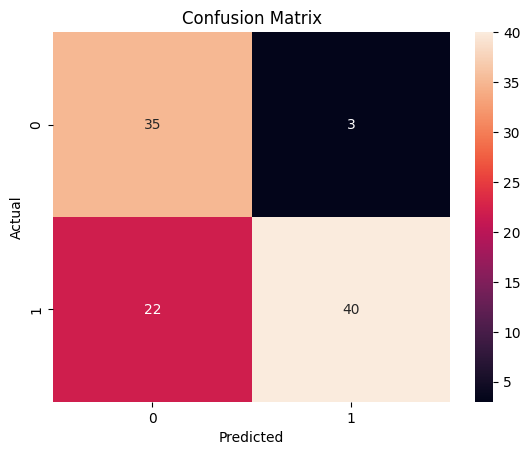

In [8]:
svm = SupportVectorMachine(C=1)
svm.fit(train_X, train_Y)
create_contour_plot(svm, train_X, train_Y)
create_contour_plot(svm, train_X, train_Y, filled=True)

# Predict the Classes Based on SVM
test_Y_hat = svm.predict(test_X)

# Predict the Classes Based on SVM
pred_Y = svm.predict(test_X)
predict_test(test_Y, pred_Y)

##### 2. SVM with a polynomial kernel on marketing target data along with prediction confidence and performance test

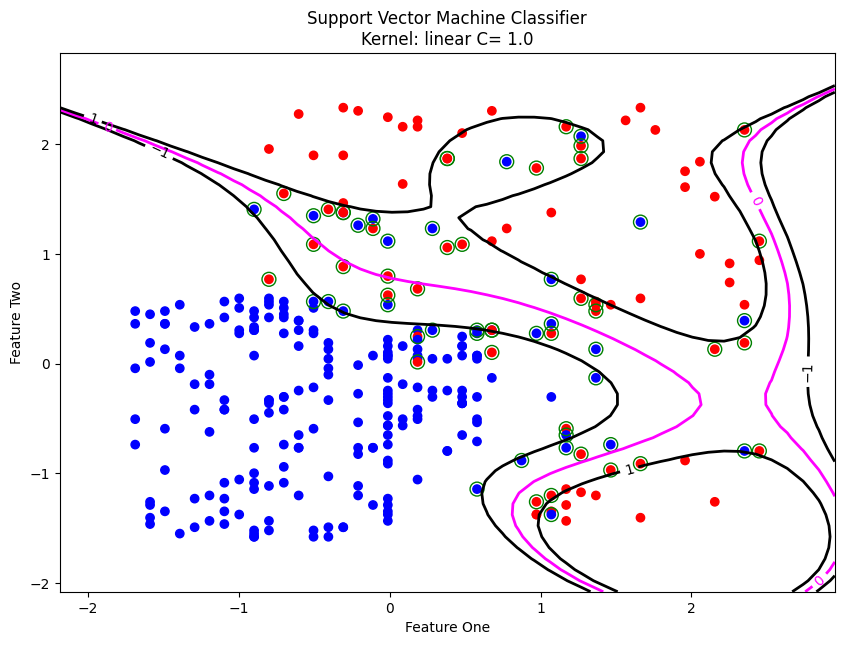

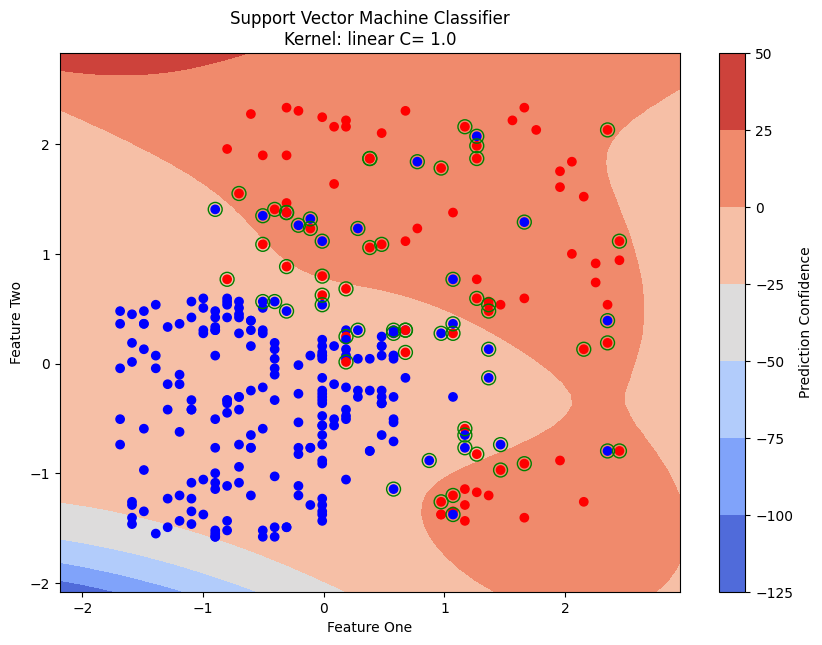

              precision    recall  f1-score   support

        -1.0       0.77      0.97      0.86        38
         1.0       0.98      0.82      0.89        62

    accuracy                           0.88       100
   macro avg       0.88      0.90      0.88       100
weighted avg       0.90      0.88      0.88       100



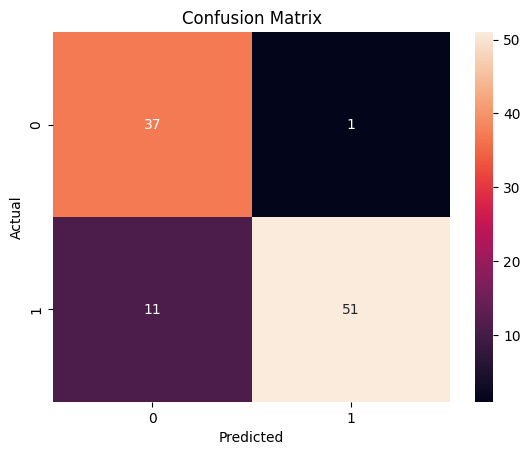

In [9]:
svm = SupportVectorMachine(kernel='polynomial', degree=5, C=1)
svm.fit(train_X, train_Y)
create_contour_plot(svm, train_X, train_Y)
create_contour_plot(svm, train_X, train_Y, filled=True)

# Predict the Classes Based on SVM
pred_Y = svm.predict(test_X)
predict_test(test_Y, pred_Y)

##### 3. SVM with a Radial Basis Function kernel on marketing target data along with prediction confidence and performance test

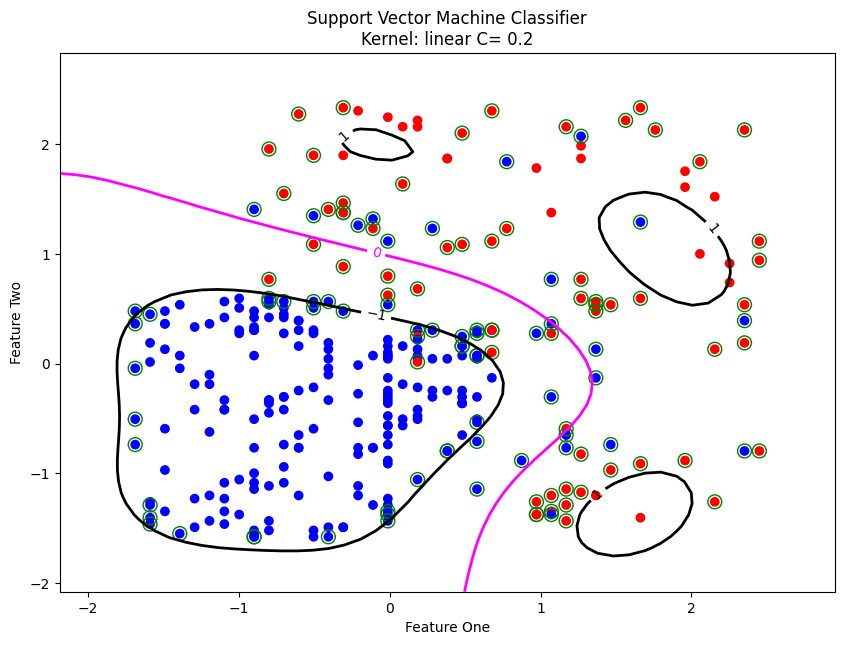

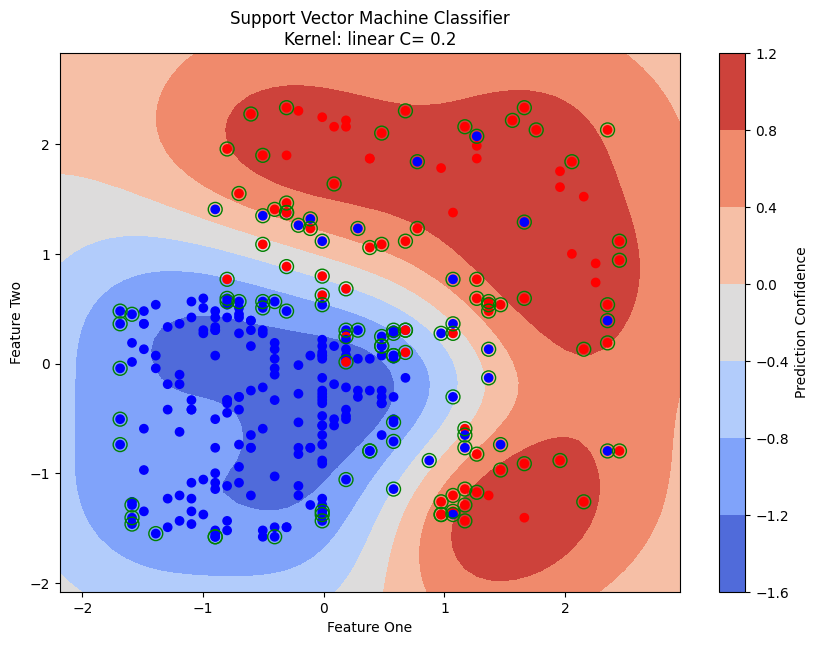

              precision    recall  f1-score   support

        -1.0       0.79      0.97      0.87        38
         1.0       0.98      0.84      0.90        62

    accuracy                           0.89       100
   macro avg       0.88      0.91      0.89       100
weighted avg       0.91      0.89      0.89       100



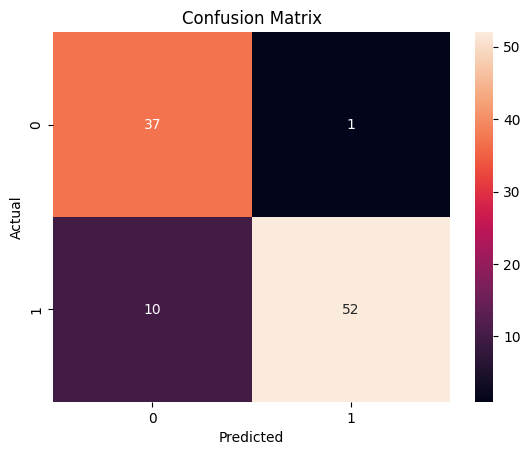

In [10]:
svm = SupportVectorMachine(kernel='rbf', gamma=1, C=0.2)
svm.fit(train_X, train_Y)
create_contour_plot(svm, train_X, train_Y)
create_contour_plot(svm, train_X, train_Y, filled=True)

# Predict the Classes Based on SVM
pred_Y = svm.predict(test_X)
predict_test(test_Y, pred_Y)